# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : rikitea
City not found. Skipping...
Processing Record 2 of Set 1 : katangli
Processing Record 3 of Set 1 : balkanabat
City not found. Skipping...
Processing Record 4 of Set 1 : ushuaia
Processing Record 5 of Set 1 : pevek
Processing Record 6 of Set 1 : chokurdakh
Processing Record 7 of Set 1 : conakry
Processing Record 8 of Set 1 : bluff
Processing Record 9 of Set 1 : puerto ayora
Processing Record 10 of Set 1 : kaitangata
Processing Record 11 of Set 1 : abha
City not found. Skipping...
Processing Record 12 of Set 1 : new norfolk
Processing Record 13 of Set 1 : port alfred
Processing Record 14 of Set 1 : kudahuvadhoo
Processing Record 15 of Set 1 : hilo
Processing Record 16 of Set 1 : los algarrobos
Processing Record 17 of Set 1 : lakes entrance
Processing Record 18 of Set 1 : kapaa
Processing Record 19 of Set 1 : diego de almagro
Processing Record 20 of Set 1 : qaanaaq
Processing Record 21 of Set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
# Save city data into a csv file
path = os.path.join("output_data", "cities.csv")
weather_df.to_csv(path, index = False)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1644432157,67,-23.1203,-134.9692,78.78,16.49
1,Katangli,100,RU,1644432359,93,51.7102,143.2326,12.31,11.05
2,Balkanabat,0,TM,1644432360,29,39.5108,54.3671,54.36,7.81
3,Ushuaia,40,AR,1644432105,41,-54.8000,-68.3000,58.62,14.97
4,Pevek,100,RU,1644432361,99,69.7008,170.3133,-31.90,5.50


In [5]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,55.527629,1.644432e+09,70.614973,18.341156,16.244460,54.294189,8.334242
std,40.921000,7.060349e+01,23.645629,33.053727,91.119008,31.373318,5.947010
min,0.000000,1.644432e+09,6.000000,-54.800000,-179.166700,-44.880000,0.000000
25%,10.000000,1.644432e+09,58.000000,-8.583300,-67.397800,37.440000,4.270000
50%,67.000000,1.644432e+09,77.000000,20.700000,18.693000,65.170000,7.180000
75%,100.000000,1.644432e+09,89.000000,45.616900,100.974800,77.920000,10.940000
max,100.000000,1.644433e+09,100.000000,78.218600,178.416700,99.280000,39.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Based on the table above, the maximum humidity is 100 so we have nothing to do here

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

We are analyzing latitude vs temperature and we can realize that once the latitude passes 20, the temperatures starts dropping.


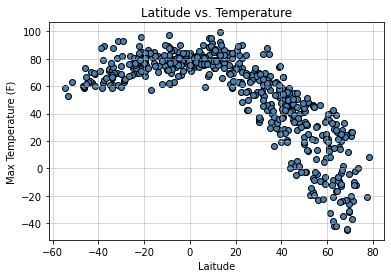

In [30]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
path = os.path.join("Images", "Latitude vs. Temperature Plot.png")
plt.savefig(path)
print("We are analyzing latitude vs temperature and we can realize that once the latitude passes 20, the temperatures starts dropping.")

## Latitude vs. Humidity Plot

We are analyzing latitude vs humidity and we can notice that humidity is low when the latitude is around zero


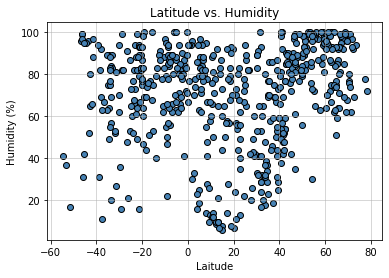

In [31]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
path = os.path.join("Images", "Latitude vs. Humidity Plot.png")
plt.savefig(path)
print("We are analyzing latitude vs humidity and we can notice that humidity is low when the latitude is around zero")

## Latitude vs. Cloudiness Plot

We are analyzing latitude vs cloudiness and we realize that cloudiness is clustered either at zero or at a hundred


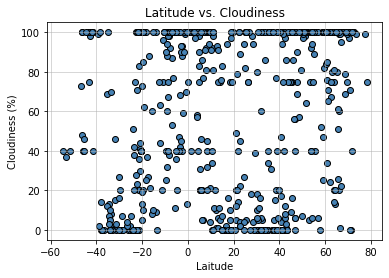

In [32]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
path = os.path.join("Images", "Latitude vs. Cloudiness Plot.png")
plt.savefig(path)
print("We are analyzing latitude vs cloudiness and we realize that cloudiness is clustered either at zero or at a hundred")

## Latitude vs. Wind Speed Plot

We are analyzing latitude vs wind speed and we can realize that wind speed is relatively the same across different latitudes


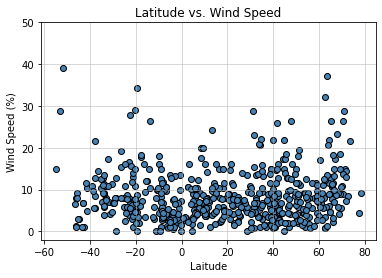

In [33]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
path = os.path.join("Images", "Latitude vs. Wind Speed Plot.png")
plt.savefig(path)
print("We are analyzing latitude vs wind speed and we can realize that wind speed is relatively the same across different latitudes")

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


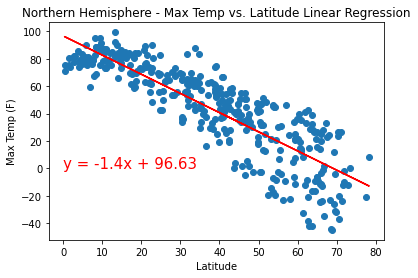

In [20]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
path = os.path.join("Images", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot.png")
plt.savefig(path)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52
After looking at both graphs we can see that they are going in oposite directions. As the latitude increases above zero, the temperature drops 
and as the latitude decreases below zero, the temperature increases.


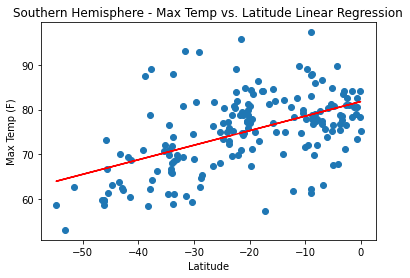

In [36]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
path = os.path.join("Images", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot.png")
plt.savefig(path)

print("After looking at both graphs we can see that they are going in oposite directions. As the latitude increases above zero, the temperature drops ")
print("and as the latitude decreases below zero, the temperature increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41


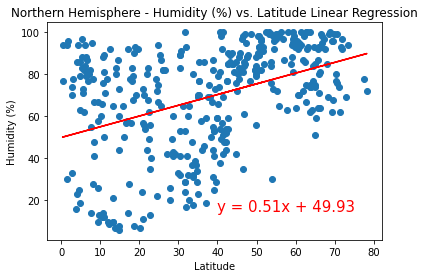

In [23]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
path = os.path.join("Images", "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot.png")
plt.savefig(path)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19
After looking at both graphs, we notice that humidity changes in a similar way in both the southern and northern hemispheres


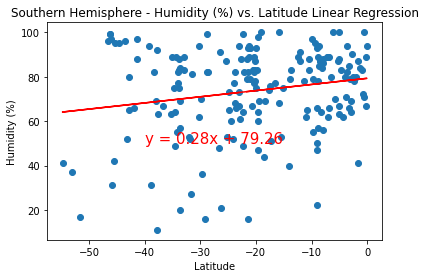

In [35]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
path = os.path.join("Images", "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot.png")
plt.savefig(path)
print("After looking at both graphs, we notice that humidity changes in a similar way in both the southern and northern hemispheres")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


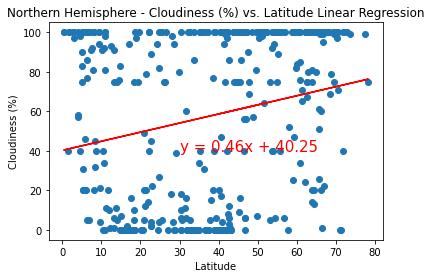

In [25]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
path = os.path.join("Images", "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot.png")
plt.savefig(path)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.35
After looking at both graphs, we notice that cloudiness changes in a similar way in both the southern and northern hemispheres 
however, the points in the southern hemisphere are slightly shifted to the right


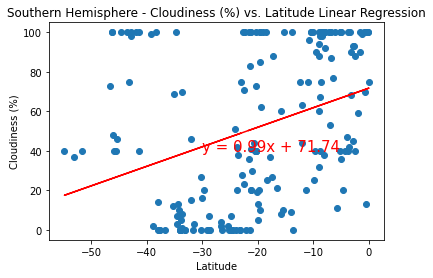

In [37]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
path = os.path.join("Images", "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot.png")
plt.savefig(path)
print("After looking at both graphs, we notice that cloudiness changes in a similar way in both the southern and northern hemispheres ")
print("however, the points in the southern hemisphere are slightly shifted to the right")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19


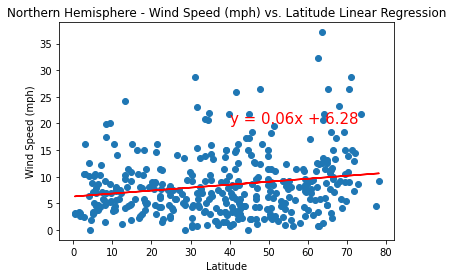

In [27]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
path = os.path.join("Images", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot.png")
plt.savefig(path)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23
After looking at both graphs we can see that they are going in oposite directions. As the latitude increases above zero, the wind speed increases 
and as the latitude decreases below zero, the wind speed decreases.


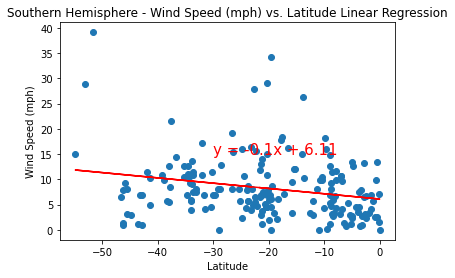

In [38]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
path = os.path.join("Images", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot.png")
plt.savefig(path)
print("After looking at both graphs we can see that they are going in oposite directions. As the latitude increases above zero, the wind speed increases ")
print("and as the latitude decreases below zero, the wind speed decreases.")